In [73]:
##Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [75]:
df.shape

(200, 4)

In [76]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [77]:
## Checking the missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [78]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Exploratory Data analysis

### Since the correlation between Newspaper,Radio and sales is less we can drop this values

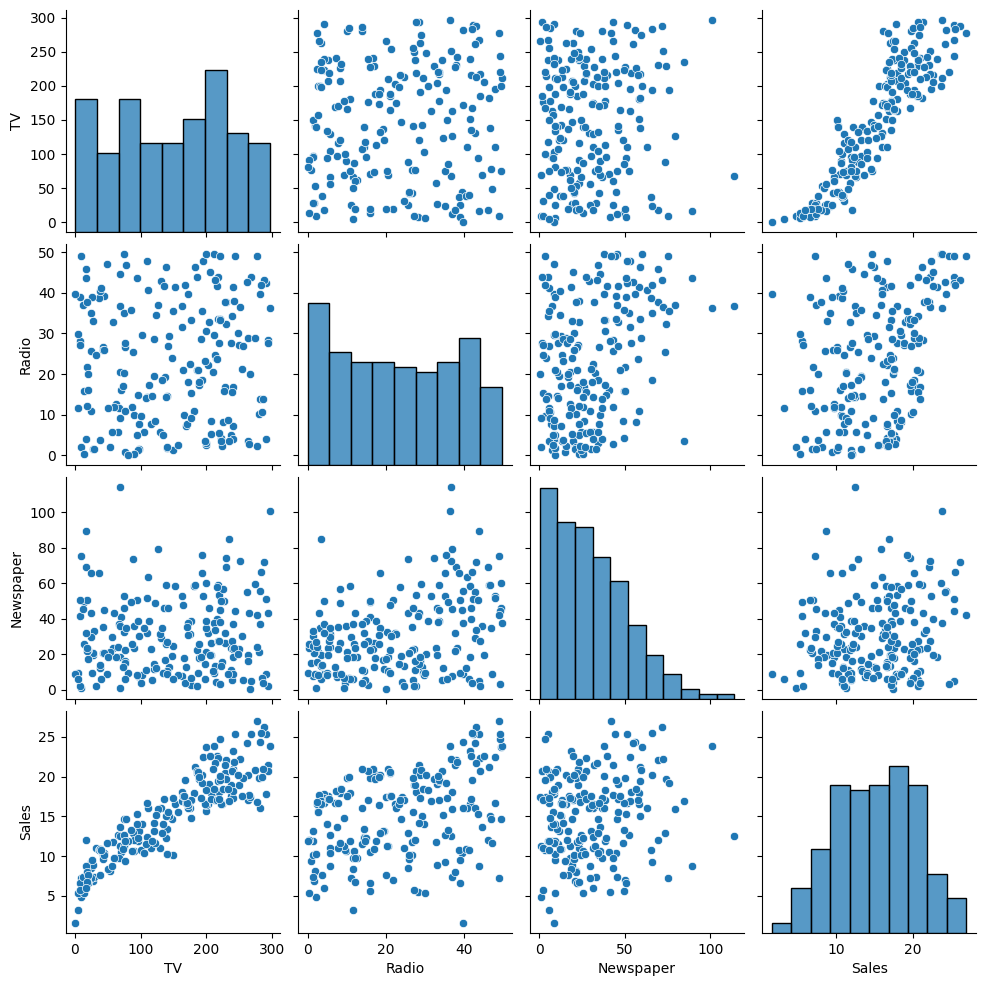

In [79]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'Sales')

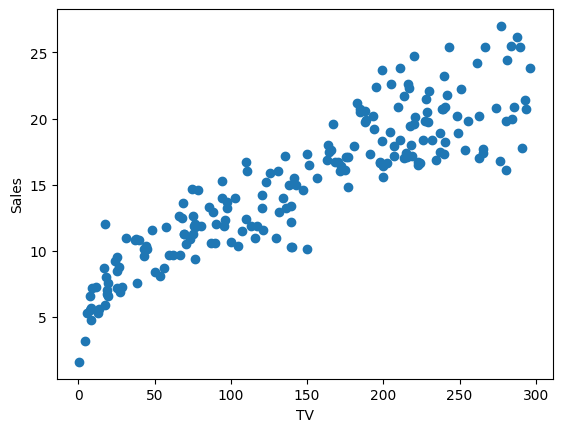

In [80]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

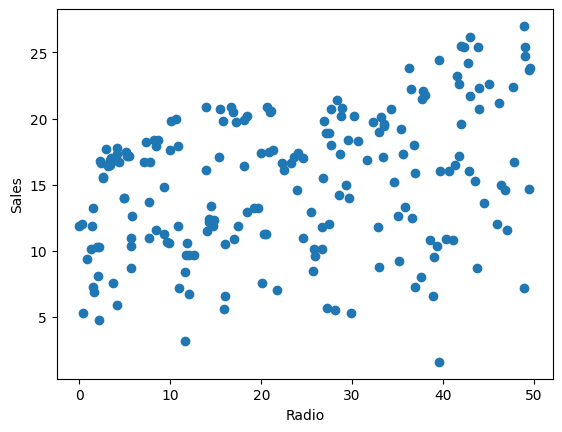

In [81]:
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

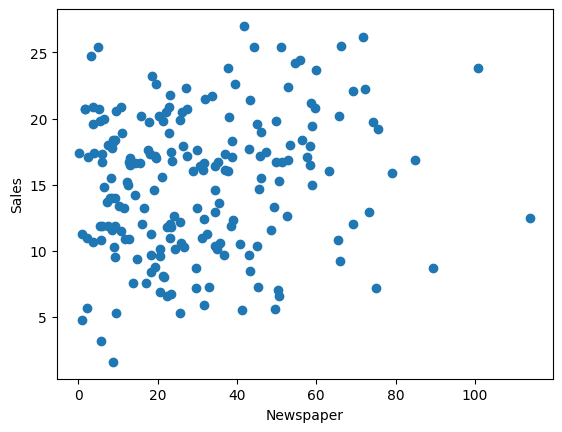

In [82]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")

### Newspaper and Radio is more scattered than Tv so we can conclude that Tv will be more linear with sales than the Newspaper and Radio

<AxesSubplot: xlabel='TV', ylabel='Sales'>

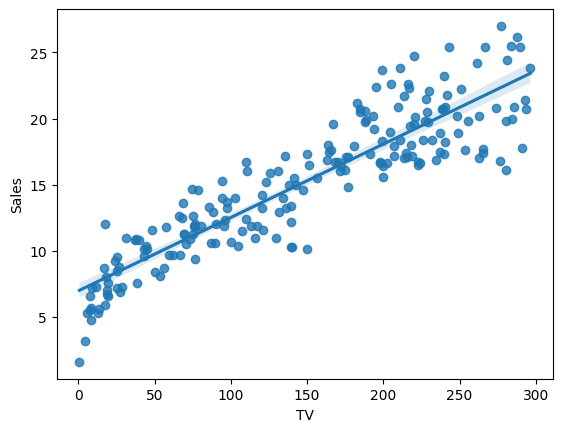

In [83]:
import seaborn as sns
sns.regplot(x="TV",y="Sales",data=df)

<AxesSubplot: xlabel='Radio', ylabel='Sales'>

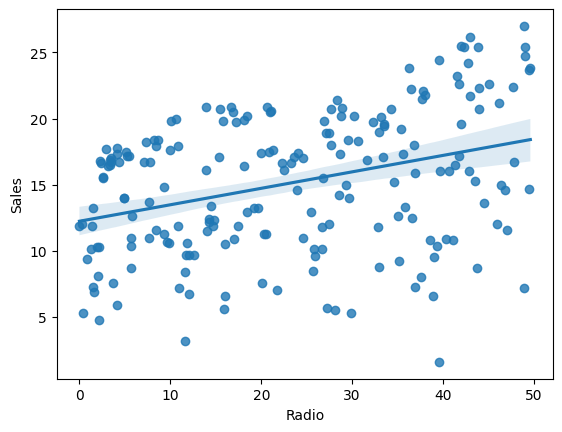

In [84]:
sns.regplot(x="Radio",y="Sales",data=df)

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

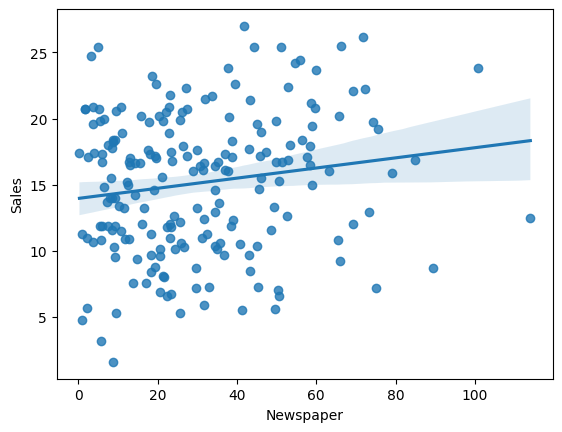

In [85]:
sns.regplot(x="Newspaper",y="Sales",data=df)

### We can conclude that from the regplot, Tv is linearly related to sales than Newspaper and Radio

In [86]:
df.values.reshape(1,-1)

array([[230.1,  37.8,  69.2,  22.1,  44.5,  39.3,  45.1,  10.4,  17.2,
         45.9,  69.3,  12. , 151.5,  41.3,  58.5,  16.5, 180.8,  10.8,
         58.4,  17.9,   8.7,  48.9,  75. ,   7.2,  57.5,  32.8,  23.5,
         11.8, 120.2,  19.6,  11.6,  13.2,   8.6,   2.1,   1. ,   4.8,
        199.8,   2.6,  21.2,  15.6,  66.1,   5.8,  24.2,  12.6, 214.7,
         24. ,   4. ,  17.4,  23.8,  35.1,  65.9,   9.2,  97.5,   7.6,
          7.2,  13.7, 204.1,  32.9,  46. ,  19. , 195.4,  47.7,  52.9,
         22.4,  67.8,  36.6, 114. ,  12.5, 281.4,  39.6,  55.8,  24.4,
         69.2,  20.5,  18.3,  11.3, 147.3,  23.9,  19.1,  14.6, 218.4,
         27.7,  53.4,  18. , 237.4,   5.1,  23.5,  17.5,  13.2,  15.9,
         49.6,   5.6, 228.3,  16.9,  26.2,  20.5,  62.3,  12.6,  18.3,
          9.7, 262.9,   3.5,  19.5,  17. , 142.9,  29.3,  12.6,  15. ,
        240.1,  16.7,  22.9,  20.9, 248.8,  27.1,  22.9,  18.9,  70.6,
         16. ,  40.8,  10.5, 292.9,  28.3,  43.2,  21.4, 112.9,  17.4,
      

In [87]:
### Independent and Dependent feature
X=df['TV']
y=df['Sales']

In [88]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
X_train

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 140, dtype: float64

In [90]:
y_train

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 140, dtype: float64

In [95]:
import statsmodels.api as sm

In [96]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
regression = sm.OLS(y_train, X_train_sm).fit()

In [97]:
regression.params

const    7.206555
TV       0.054835
dtype: float64

In [99]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           5.08e-50
Time:                        15:18:20   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

## Plot the visuals

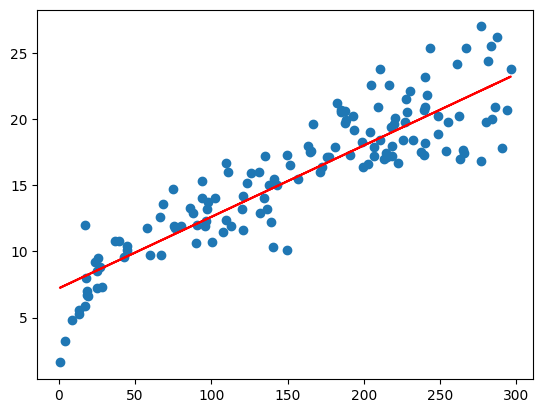

In [100]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.2066 + 0.054*X_train, 'r')
plt.show()

### Model evaluation

In [101]:
y_pred=regression.predict(X_train_sm)
residual=(y_train - y_pred)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7080\1090388022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins = 15)


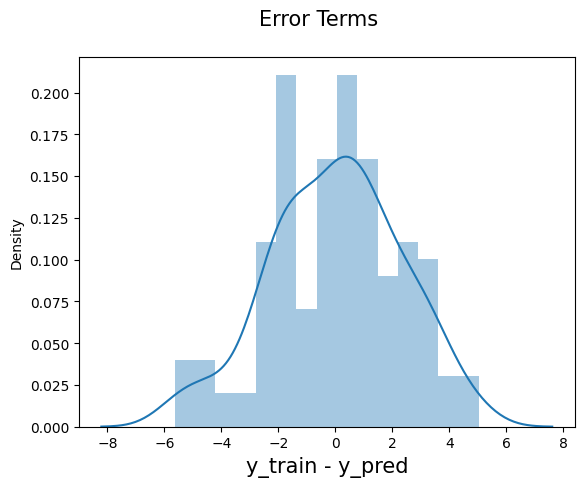

In [102]:
fig = plt.figure()
sns.distplot(residual, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)            # Plot heading 
plt.xlabel('y_train - y_pred', fontsize = 15)         # X-label
plt.show()

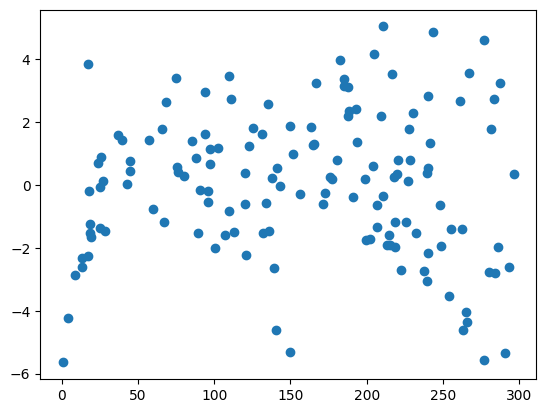

In [103]:
plt.scatter(X_train,residual)
plt.show()

### Prediction on the X test

In [105]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = regression.predict(X_test_sm)

In [106]:
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.27585706980176

#### R square

In [109]:
r_square = r2_score(y_test, y_pred)
r_square

0.814855389208679

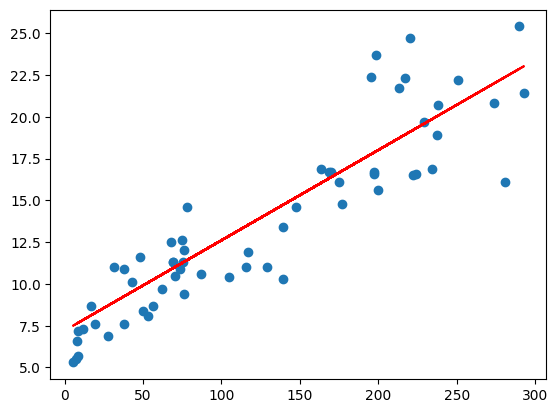

In [110]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.2066 + 0.054 * X_test, 'r')
plt.show()